# Introduction to NetworkX: Creating, Manipulating, and Visualizing Graphs

**Goal:** This tutorial introduces the fundamental operations of the NetworkX library. We will learn how to:
1.  Create a Graph
2.  Add Nodes and Edges
3.  Examine basic graph properties
4.  Add attributes (like weights) to nodes and edges
5.  Perform basic visualization

## 1. Import Necessary Libraries

First, we need to import the `networkx` library, conventionally aliased as `nx`.
We will also import `matplotlib.pyplot` (aliased as `plt`), which is the library NetworkX uses by default for plotting.
`%matplotlib inline` is a "magic" command that ensures our plots appear directly inside the notebook.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

print("NetworkX and Matplotlib imported successfully!")

NetworkX and Matplotlib imported successfully!


## 2. Creating a Graph

NetworkX provides classes for different types of graphs. The four most common are:

* **`nx.Graph()`**: An **undirected graph**. Edges do not have a direction. Adding an edge (A, B) is the same as adding (B, A).
* **`nx.DiGraph()`**: A **directed graph** (or "digraph"). Edges have a direction (e.g., A -> B is different from B -> A).
* **`nx.MultiGraph()`**: An undirected graph that allows **multiple edges** between the same two nodes (e.g., two different flights on different days between two cities).
* **`nx.MultiDiGraph()`**: A directed graph that allows multiple edges.

We will continue here with the simplest and most common one, `nx.Graph()`.

In [6]:
G = nx.Graph()

print(G)

Graph with 0 nodes and 0 edges


## 3. Adding Nodes

Nodes can be almost any "hashable" Python object, such as numbers, strings, or tuples.

We can add nodes one at a time or from a list.

In [7]:
G.add_node(1)

G.add_nodes_from([2, 3, "Alice", "Bob"])

print("All nodes in the graph:", G.nodes())

All nodes in the graph: [1, 2, 3, 'Alice', 'Bob']


## 4. Adding Edges

Edges are the connections between two nodes.

* `G.add_edge(A, B)` adds a single edge between A and B.
* `G.add_edges_from([(A, B), (C, D)])` adds multiple edges from a list of tuples.

**Attention:** If you add an edge to a node that doesn't exist yet (e.g., `G.add_edge(1, "Charlie")`), NetworkX will automatically create that node ("Charlie") for you.

In [8]:
G.add_edge(1, 2)

G.add_edges_from([(1, 3), (1, "Alice"), ("Alice", "Bob")])

G.add_edge("Bob", "Charlie")

print("All edges in the graph:", G.edges())
print("All nodes in the graph:", G.nodes())

All edges in the graph: [(1, 2), (1, 3), (1, 'Alice'), ('Alice', 'Bob'), ('Bob', 'Charlie')]
All nodes in the graph: [1, 2, 3, 'Alice', 'Bob', 'Charlie']


## 5. Examining Basic Graph Information

Now that our graph has some nodes and edges, we can quickly inspect its properties.

In [10]:
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"Total number of edges: {G.number_of_edges()}")

print(f"Neighbors of node 1: {list(G.neighbors(1))}")
print(f"Neighbors of node 'Alice': {list(G.neighbors('Alice'))}")

print(f"Degree of node 1: {G.degree(1)}")
print(f"Degree of node 'Alice': {G.degree('Alice')}")

Total number of nodes: 6
Total number of edges: 5
Neighbors of node 1: [2, 3, 'Alice']
Neighbors of node 'Alice': [1, 'Bob']
Degree of node 1: 3
Degree of node 'Alice': 2


## 6. Visualizing Basic Graph Structure

Time to see what our graph looks like.
`nx.draw()` is the most basic drawing command.

* `with_labels=True` will display the node names.
* `node_color` and `font_weight` are simple styling options.

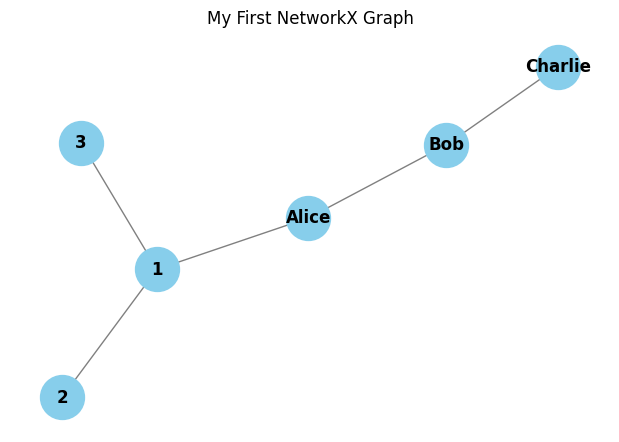

In [11]:
# Draw the graph G
plt.figure(figsize=(6, 4)) # Optional: set the figure size
nx.draw(G,
        with_labels=True,
        node_color='skyblue',
        edge_color='gray',
        font_weight='bold',
        node_size=1000)
plt.title("My First NetworkX Graph")
plt.show()

## 7. Adding Attributes to Nodes and Edges

This is crucial for real-world network analysis.

* **Node Attributes**: e.g., 'age' of a person or 'population' of a city.
* **Edge Attributes**: e.g., 'distance' between two cities or 'strength' of a relationship. This is often called a **Weight**.

We can add attributes as keyword arguments when adding nodes/edges.

**Attention:** if such node or edge already exists, doing this will update/add its attributes.

In [14]:
G.add_node("David", role="Engineer", age=30)
G.add_node("Elaine", role="Manager", age=45)
G.add_node(1, role="Intern")

G.add_edge(1, "David", weight=5.0)
G.add_edge("Alice", "Elaine", weight=1.5, relation="colleague")

print("--- Node Attributes ---")
print(f"David's role: {G.nodes['David']['role']}")
print(f"All node data: {G.nodes(data=True)}")

print("\n--- Edge Attributes ---")
edge_ae = G.edges["Alice", "Elaine"]
print(f"Relation between Alice and Elaine: {edge_ae['relation']}")
print(f"Weight between Alice and Elaine: {edge_ae['weight']}")
print(f"All edge data: {G.edges(data=True)}")

--- Node Attributes ---
David's role: Engineer
All node data: [(1, {'role': 'Intern'}), (2, {}), (3, {}), ('Alice', {}), ('Bob', {}), ('Charlie', {}), ('David', {'role': 'Engineer', 'age': 30}), ('Elaine', {'role': 'Manager', 'age': 45})]

--- Edge Attributes ---
Relation between Alice and Elaine: colleague
Weight between Alice and Elaine: 1.5
All edge data: [(1, 2, {}), (1, 3, {}), (1, 'Alice', {}), (1, 'David', {'weight': 5.0}), ('Alice', 'Bob', {}), ('Alice', 'Elaine', {'weight': 1.5, 'relation': 'colleague'}), ('Bob', 'Charlie', {})]


## 8. Visualizing a Weighted Graph

When we have weights, we might want to display them on the graph.
This is slightly more complex:
1.  First, we need a "layout" that defines the (x, y) position of each node (`pos`).
2.  We draw the nodes and edges.
3.  We separately extract the edge weights/labels.
4.  We use `nx.draw_networkx_edge_labels()` to draw those labels.

**Hint:** You may notice that, with the "force-directed" Spring Layout, edges with higher weights are shorter.

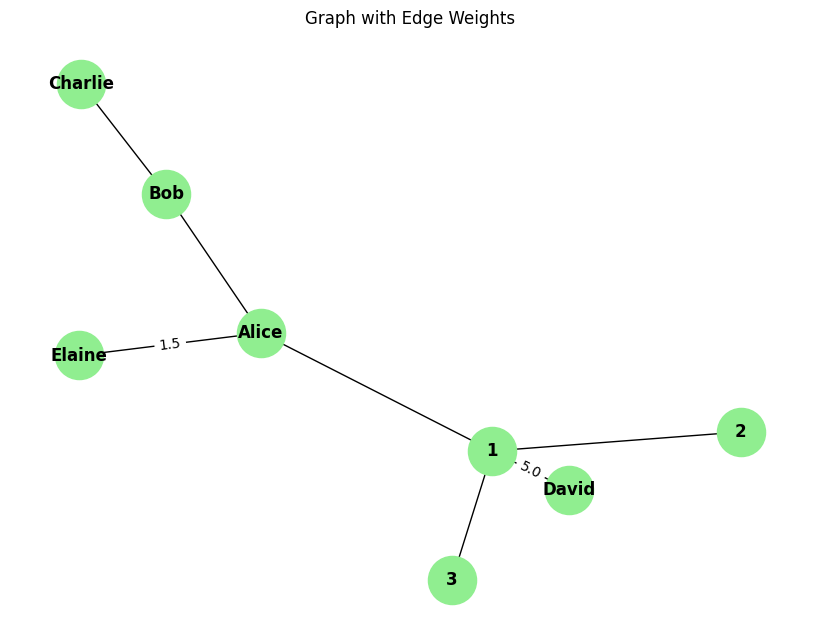

In [15]:
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(G, pos,
        with_labels=True,
        node_color='lightgreen',
        font_weight='bold',
        node_size=1200)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph with Edge Weights")
plt.show()